# L2 (Ridge regularisation)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder

from IPython.display import clear_output

## Souces

- https://www.statlearning.com/ 6 глава.

## Description



In L2-regularisation, a component is added to the target function of the coefficient estimation method:

$$\lambda\sum_{j=1}^n\beta^2_j$$

Where:
- $\beta_j$ - estimated coefficient;
- $\lambda$ - parameter indicating how much the model should be regularised.

## Regression

L2-regularisation combined with a regression model is called **ridge regression**.

So if we use MSE as a quality function, we will have a modifide function:

$$\sum_{i=1}^n\left(y_i - x_i\beta\right)^2 + \lambda\sum_{j=1}^p\beta^2_j \rightarrow min$$

Where:

- $n$ - sample size;
- $p$ - data dimention;
- $x_i = (x_{i1}, x_{i2}, ..., x_{ip})$ - vector describing the $i\text{-}th$ observation;
- $\beta = (\beta_1, \beta_2, ..., \beta_p)$ - vector of coefficient estimates.


**Note** To perform refularization to regression you need to ensure that your features have the same scaling. Check more [here](scaling_and_regularisation.ipynb).

## Compression of coefficients

Here I reproduce the experiment from the <a href="https://www.statlearning.com/">ISLR</a>.

Loading `Credit` data.

In [4]:
Credit = pd.read_csv("Credit.csv", index_col = 0)

nominal_names = [
    "Gender", "Student", "Married", "Ethnicity"
]

ohe = OneHotEncoder(
    sparse_output = False, drop = "first"
).fit(
    Credit[nominal_names]
)

Credit = pd.concat(
    [
        pd.DataFrame(
            ohe.transform(Credit[nominal_names]),
            columns = ohe.get_feature_names_out(),
            index= Credit.index
        ),
        Credit.loc[:,~Credit.columns.isin(nominal_names)]
    ],
    axis = 1
)

X = Credit.iloc[:,:-1]
y = Credit.iloc[:, -1]

Credit.head()

,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Income,Limit,Rating,Cards,Age,Education,Balance
ID,,,,,,,,,,,,
1,0.0,0.0,1.0,0.0,1.0,14.891,3606,283,2,34,11,333
2,1.0,1.0,1.0,1.0,0.0,106.025,6645,483,3,82,15,903
3,0.0,0.0,0.0,1.0,0.0,104.593,7075,514,4,71,11,580
4,1.0,0.0,0.0,1.0,0.0,148.924,9504,681,3,36,11,964
5,0.0,0.0,1.0,0.0,1.0,55.882,4897,357,2,68,16,331


We will increase the regularisation parameter and take the values of the coefficients. The procedure is rather long, so it is supposed to perform the calculation and put the results in a file.

In [ ]:
# coefs_frame = pd.DataFrame(columns = X.columns)

# stand_X = X/np.sqrt(((X - X.mean())**2).sum()/X.shape[0])

# alphas = np.arange(0, 2000, 0.01)
# int_count = len(alphas)

# for i, alpha in enumerate(alphas):
#     clear_output(wait=True)
#     print("{}/{}".format(i, int_count))
#     coefs_frame.loc[alpha] = pd.Series(
#         Ridge(alpha = alpha).fit(stand_X,y).coef_,
#         index = X.columns
#     )
    
# coefs_frame.index.name = "alpha"
# coefs_frame.to_csv("l2_regularisation_files/l2_reg_coefs.csv")

The obtained values of coefficients are plotted on the graphs.

In [5]:
coefs_frame = pd.read_csv("l2_regularisation_files/l2_reg_coefs.csv", index_col = 0)

plot_var_names = ["Limit", "Rating", "Student_Yes", "Income"]
line_styles = ['-', '--', '-.', ':']

beta_0 = np.sqrt(np.sum(coefs_frame.loc[0]**2))
coefs_frame["beta_i/beta_0"] = coefs_frame.apply(
    lambda row: np.sqrt(np.sum(row**2))/beta_0,
    axis = 1
)

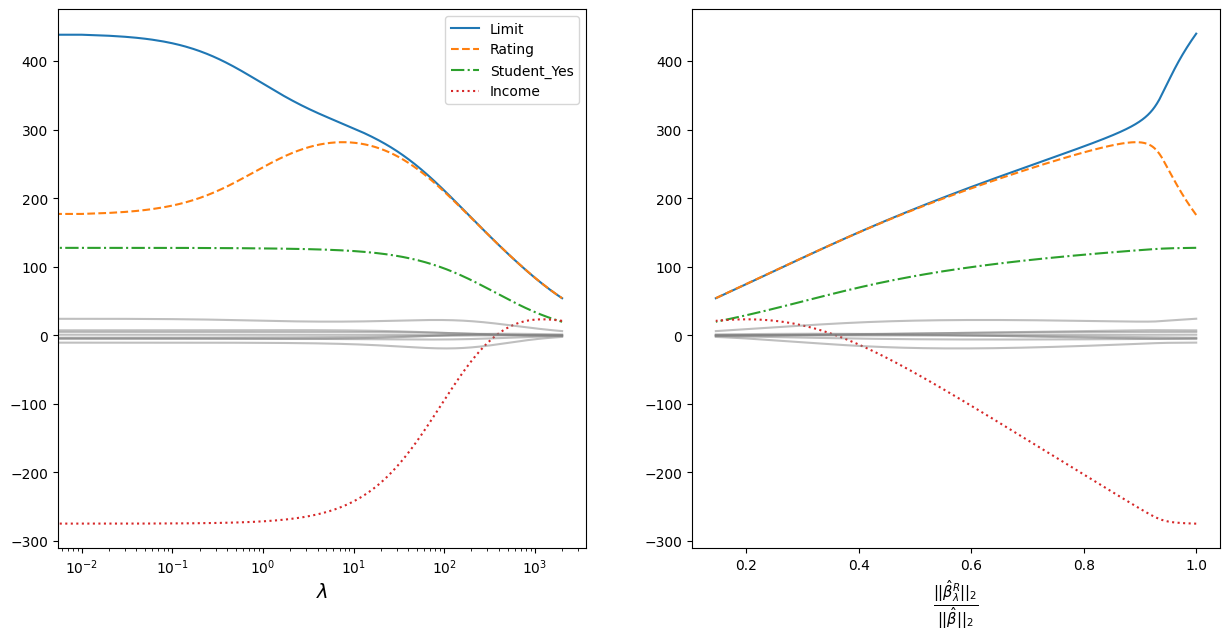

In [6]:
plt.figure(figsize = [15, 7])
plt.subplot(121)

for i in range(len(plot_var_names)):
    plt.plot(
        coefs_frame.index, 
        coefs_frame[plot_var_names[i]],
        linestyle = line_styles[i]
    )
    
for col in coefs_frame.loc[
    :, ~coefs_frame.columns.isin(plot_var_names)
]:
    plt.plot(
        coefs_frame.index, coefs_frame[col], 
        color = "gray", alpha = 0.5
    )
    
plt.legend(plot_var_names)
plt.xlabel("$\\lambda$", fontsize = 14)
    
plt.gca().set_xscale("log")

plt.subplot(122)

for i in range(len(plot_var_names)):
    plt.plot(
        coefs_frame["beta_i/beta_0"], 
        coefs_frame[plot_var_names[i]],
        linestyle = line_styles[i]
    )
    
for col in coefs_frame.loc[
    :, ~coefs_frame.columns.isin(plot_var_names)
]:
    plt.plot(
        coefs_frame["beta_i/beta_0"], coefs_frame[col], 
        color = "gray", alpha = 0.5
    )

ans = plt.xlabel(
    "$\\frac{||\\hat{\\beta}_{\\lambda}^R||_2}{||\\hat{\\beta}||_2}$",
    fontsize = 15
)

- The graph on the left shows how the coefficients converge as the regularisation parameter increases. For clarity, a logarithmic scale for the regularisation parameter is taken. The most prominent coefficients are highlighted in colour and line style - the data are standardised, so the scale of the values does not matter;
- The vergence is plotted to the right on the ordinate:

$$\frac{||\hat{\beta}_{\lambda}^R|_2}{||\hat{\beta}||_2}$$

Where:
- $||\beta||_2 = \sqrt{\sum_{j=1}^p \beta^2_j}$ - is the Euclidean distance of the coefficients $\beta$ from the origin;
- $\hat{\beta}$ - coefficients obtained by the least squares method (equivalent to the coefficients obtained at $\lambda = 0$);
- $\hat{\beta}^R_{\lambda}$ - coefficients obtained using regularisation.